In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import joblib

In [2]:
df = pd.read_csv(r'C:\Users\SreeKeerthiReddyThat\Downloads\framingham.csv')

In [3]:
features = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
            'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
            'diaBP', 'BMI', 'heartRate', 'glucose']

target = 'TenYearCHD'

In [4]:
X = df[features]
y = df[target]

In [5]:
X = X.fillna(X.median())

In [6]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

df_clean = df[features + [target]].dropna()

# Split into features (X) and target (y)
X = df_clean[features]
y = df_clean[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Convert to DataFrame (optional)
X_resampled_df = pd.DataFrame(X_resampled, columns=features)
y_resampled_df = pd.Series(y_resampled, name=target)

# Check class distribution after SMOTE
print("✅ Class distribution after SMOTE:")
print(y_resampled_df.value_counts())

✅ Class distribution after SMOTE:
TenYearCHD
0    3101
1    3101
Name: count, dtype: int64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
model.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.855191256830601

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       621
           1       0.59      0.15      0.24       111

    accuracy                           0.86       732
   macro avg       0.73      0.57      0.58       732
weighted avg       0.82      0.86      0.82       732



In [11]:
with open("gb_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [12]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [13]:
joblib.dump(model, "gb_model.joblib")


['gb_model.joblib']

In [14]:
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [15]:
with open("gb_model.pkl", "rb") as f:
    loaded_model_pickle = pickle.load(f)


with open("scaler.pkl", "rb") as f:
    loaded_scaler_pickle = pickle.load(f)

In [16]:
sample_input = X_test.iloc[0:1]
sample_scaled = loaded_scaler_pickle.transform(sample_input)
prediction = loaded_model_pickle.predict(sample_scaled)

print("Predicted TenYearCHD:", prediction[0])

Predicted TenYearCHD: 0


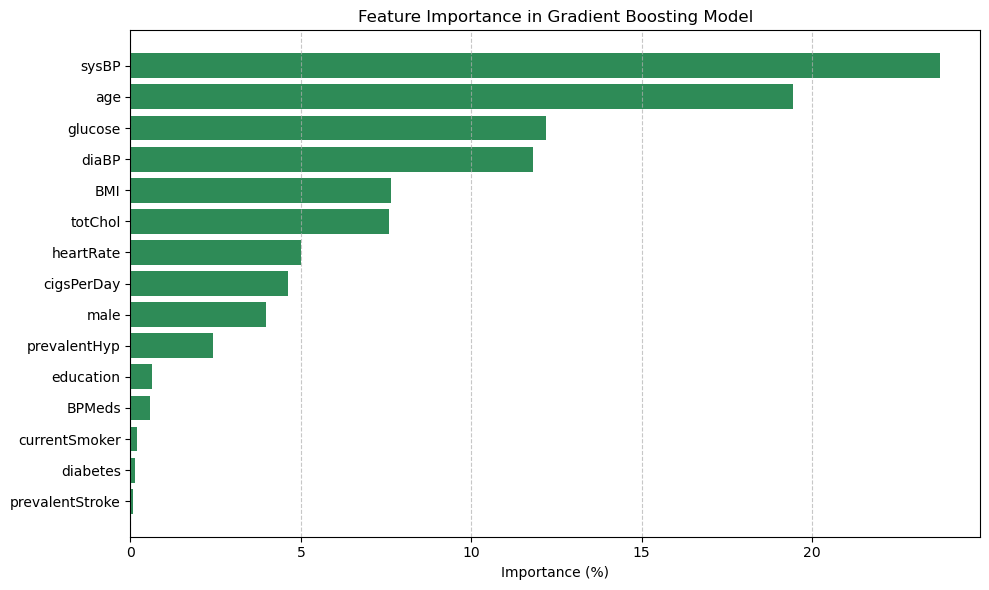

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Get importances
importances = model.feature_importances_
importances_percent = 100.0 * (importances / importances.sum())

# Prepare DataFrame
feat_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance (%)': importances_percent
}).sort_values(by='Importance (%)', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'], feat_importances['Importance (%)'], color='seagreen')
plt.xlabel('Importance (%)')
plt.title('Feature Importance in Gradient Boosting Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluation function
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"\n📊 Evaluation Metrics for {dataset_name}:")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score  : {f1_score(y_true, y_pred):.4f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate on both datasets
evaluate_model(y_train, y_train_pred, "Training Set")
evaluate_model(y_test, y_test_pred, "Testing Set")



📊 Evaluation Metrics for Training Set:
Accuracy  : 0.8804
Precision : 0.9800
Recall    : 0.2197
F1 Score  : 0.3590

Confusion Matrix:
 [[2478    2]
 [ 348   98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      2480
           1       0.98      0.22      0.36       446

    accuracy                           0.88      2926
   macro avg       0.93      0.61      0.65      2926
weighted avg       0.89      0.88      0.85      2926


📊 Evaluation Metrics for Testing Set:
Accuracy  : 0.8552
Precision : 0.5862
Recall    : 0.1532
F1 Score  : 0.2429

Confusion Matrix:
 [[609  12]
 [ 94  17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       621
           1       0.59      0.15      0.24       111

    accuracy                           0.86       732
   macro avg       0.73      0.57      0.58       732
weighted avg       0.82      0